In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

from scipy.stats import shapiro, levene, mannwhitneyu
from scipy.stats import ttest_ind, norm, chi2_contingency

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


In [3]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [4]:
# cargamos todos los conjuntos de datos: 
df = pd.read_csv("files/data-hotel.csv", index_col = 0)


# TASA CANCELACION

In [10]:
# Calcula el número total de reservas
total_reservas = len(df)

# Calcula el número de reservas canceladas (donde 'is_canceled' es True)
reservas_canceladas = (df['is_canceled'] == True).sum()

# Calcula la tasa de cancelación
tasa_cancelacion = (reservas_canceladas / total_reservas) * 100

print("Número total de reservas:", total_reservas)
print("Número de reservas canceladas:", reservas_canceladas)
print("Tasa de cancelación:", tasa_cancelacion, "%")


Número total de reservas: 117443
Número de reservas canceladas: 43589
Tasa de cancelación: 37.11502601261889 %


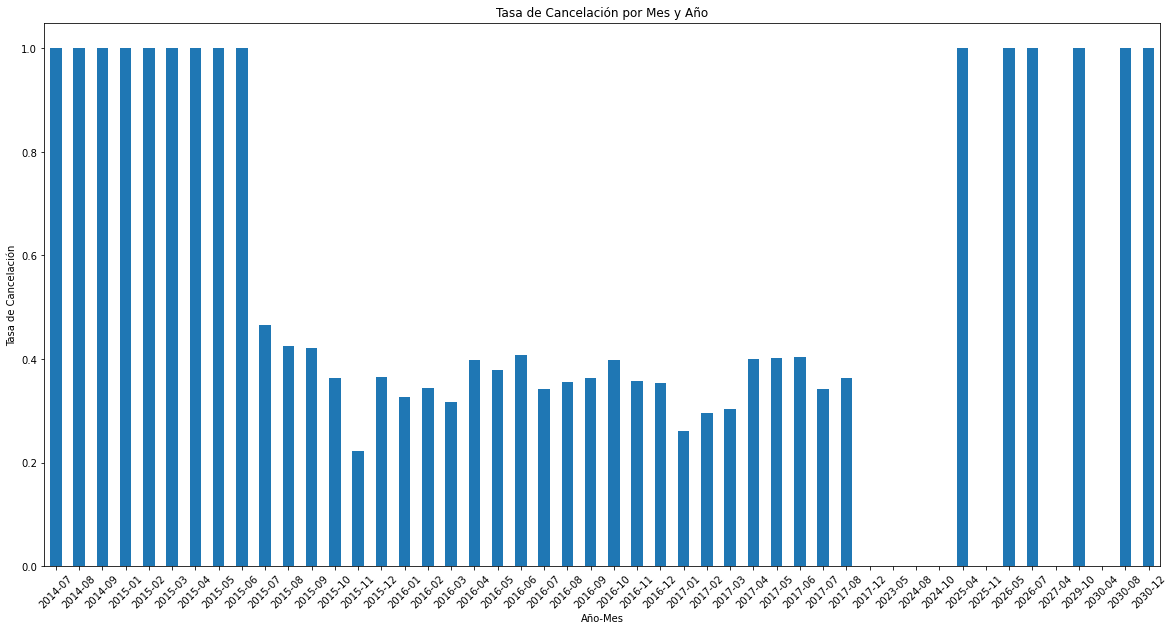

In [9]:

# Supongamos que tienes un DataFrame llamado df con las columnas 'arrival_date' y 'is_canceled'

# Convertir la columna 'arrival_date' a formato de fecha, ignorando los errores
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# Eliminar filas con fechas nulas (es decir, fechas incorrectas)
df = df.dropna(subset=['arrival_date'])

# Extraer el año y el mes de la columna 'arrival_date'
df['year_month'] = df['arrival_date'].dt.to_period('M')

# Agrupar por año y mes, y calcular la tasa de cancelación
cancelation_rates = df.groupby('year_month')['is_canceled'].agg(['sum', 'count'])
cancelation_rates['rate'] = cancelation_rates['sum'] / cancelation_rates['count']

# Graficar la tasa de cancelación
cancelation_rates['rate'].plot(kind='bar', figsize=(20, 10))
plt.title('Tasa de Cancelación por Mes y Año')
plt.xlabel('Año-Mes')
plt.ylabel('Tasa de Cancelación')
plt.xticks(rotation=45)
plt.show()

# DF AGRUPADOS CANCELADOS/TRUE FALSE

In [ ]:

df_c = df[df['is_canceled'] == True]

df_nc = df[df['is_canceled'] == False]


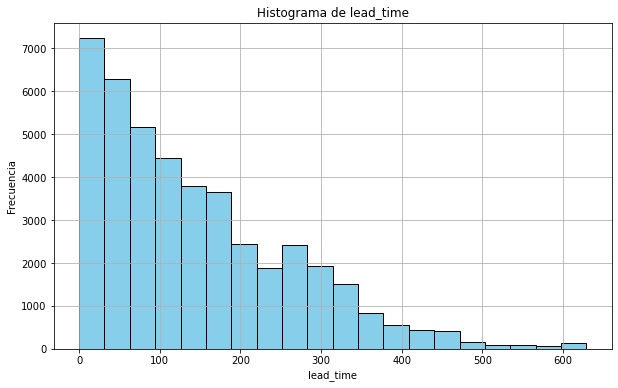

In [35]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.hist(df_c['lead_time'], bins=20, color='skyblue', edgecolor='black')  # Crear histograma con 20 bins
plt.title('Histograma de lead_time')  # Título del gráfico
plt.xlabel('lead_time')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.grid(True)  # Habilitar las líneas de la grilla
plt.show()  # Mostrar el gráfico

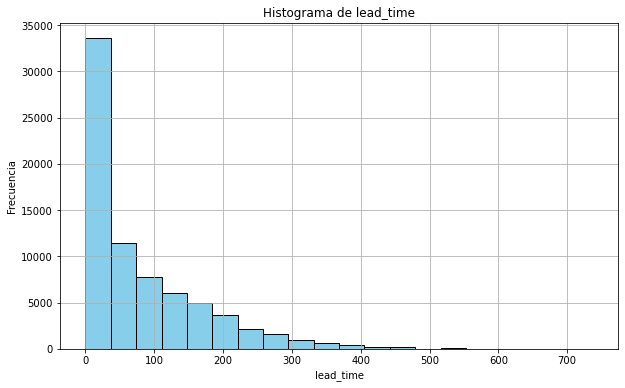

In [36]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.hist(df_nc['lead_time'], bins=20, color='skyblue', edgecolor='black')  # Crear histograma con 20 bins
plt.title('Histograma de lead_time')  # Título del gráfico
plt.xlabel('lead_time')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.grid(True)  # Habilitar las líneas de la grilla
plt.show()  # Mostrar el gráfico

#Pruebas estadisticas

In [8]:
porcentaje_por_hotel = df["hotel"].value_counts() / df.shape[0]
porcentaje_por_hotel

City Hotel      0.665634
Resort Hotel    0.334366
Name: hotel, dtype: float64

#1-Prueba tipo de hotel y cancelaciones no hay diferencia

In [14]:
tabla_cont = pd.crosstab(df["hotel"], df["is_canceled"])

tabla_cont

is_canceled,False,True
hotel,,
City Hotel,45521,32653
Resort Hotel,28333,10936


In [15]:
chi2, p_value, _, _ = chi2_contingency(tabla_cont)

print(p_value)

0.0


2- Prueba tipo meal BB/otros cancelaciones no hay diferencia

In [19]:
def asignar_tipo_meal(valor):
    if valor == 'BB':
        return 'BB'
    else:
        return 'Otro'

# Aplicar la función a cada elemento de la columna "meal" usando apply
df['tipo_meal'] = df['meal'].apply(asignar_tipo_meal)

In [20]:
df["tipo_meal"].value_counts()

BB      90715
Otro    26728
Name: tipo_meal, dtype: int64

In [21]:
tabla_cont1 = pd.crosstab(df["tipo_meal"], df["is_canceled"])

tabla_cont1

is_canceled,False,True
tipo_meal,,
BB,56716,33999
Otro,17138,9590


In [28]:
chi2, p_value, _, _ = chi2_contingency(tabla_cont1)

print(p_value)

2.0516707035274054e-06


#3-prueba asignar tipo room cancelaciones no hay diferencia

In [23]:
def asignar_tipo_room(valor):
    if valor == 'A':
        return 'A'
    else:
        return 'Otro'

# Aplicar la función a cada elemento de la columna usando apply
df['tipo_room'] = df['assigned_room_type'].apply(asignar_tipo_room)

In [25]:
df["tipo_room"].value_counts()

A       72886
Otro    44557
Name: tipo_room, dtype: int64

In [26]:
tabla_cont2 = pd.crosstab(df["tipo_room"], df["is_canceled"])

tabla_cont2

is_canceled,False,True
tipo_room,,
A,40415,32471
Otro,33439,11118


In [29]:
chi2, p_value, _, _ = chi2_contingency(tabla_cont2)

print(p_value)

0.0


#4-prueba asignar tipo customer cancelaciones no hay diferencia

In [40]:
def asignar_tipo_customer(valor):
    if valor == 'Transient':
        return "Transient"
    else:
        return 'Otro'

# Aplicar la función a cada elemento de la columna usando apply
df['tipo_customer'] = df['customer_type'].apply(asignar_tipo_customer)

In [41]:
df["tipo_customer"].value_counts()

Transient    70015
Otro         47428
Name: tipo_customer, dtype: int64

In [44]:
tabla_cont3 = pd.crosstab(df["tipo_customer"], df["is_canceled"])

tabla_cont3

is_canceled,False,True
tipo_customer,,
Otro,32319,15109
Transient,41535,28480


In [45]:
chi2, p_value, _, _ = chi2_contingency(tabla_cont3)

print(p_value)

6.944547296774731e-207


In [10]:
df_city = df[df['hotel'] == 'City Hotel']
df_resort= df[df['hotel'] == 'Resort Hotel']

Los hoteles city hotel presentan mas de el 74.91% de las cancelaciones  en este grupo el 49.1% es en fin de semana casi todas son sin niños ni bebes 80% meal BB el canal de distribucion TA/TO 27276 cancelaciones que equivalen al 62% de las cancelaciones y al 83.53% en este hotel, los clientes antiguos parece que no cancelan y no hay clientes en lista de espera, no requieren aparcamiento. la reserved_room_type a es el 55.29% de este grupo es A pero a los que le asignaron a es el 81.26% con lo cual aqui hay algo que ha pasado entre lo que pidio el cliente y lo que le han asignado. Agente mas comun el 9. Requerimientos especiales pocos